In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sites_df = pd.read_csv('../data/Site_Data.csv', nrows=25722)

In [ ]:
sites_df

In [3]:
sites_df.dtypes

FID            int64
AssignedDa    object
SurvDate      object
County        object
HistType      object
PrehType      object
Ownership     object
PhysioDiv     object
Boundary      object
LandUse       object
Disturbanc    object
RptrType      object
SurvLevel     object
dtype: object

In [4]:
sites_df.shape

(25721, 13)

### Count of recorded archaeological sites per county in TN

In [5]:
counties = sites_df.County.value_counts()
counties

Montgomery    1265
Stewart        771
Shelby         764
Monroe         742
Davidson       690
              ... 
Lewis           42
Crockett        27
Hancock         20
                 4
DV               3
Name: County, Length: 97, dtype: int64

In [6]:
counties = counties.reset_index()
counties

,index,County
0,Montgomery,1265
1,Stewart,771
2,Shelby,764
3,Monroe,742
4,Davidson,690
...,...,...
92,Lewis,42
93,Crockett,27
94,Hancock,20
95,,4


In [7]:
counties = counties.rename(columns={"index": "county", "County": "recorded_sites"})
counties

,county,recorded_sites
0,Montgomery,1265
1,Stewart,771
2,Shelby,764
3,Monroe,742
4,Davidson,690
...,...,...
92,Lewis,42
93,Crockett,27
94,Hancock,20
95,,4


In [8]:
counties_2 = counties.drop(index=[95,96], axis=0)
counties_2

,county,recorded_sites
0,Montgomery,1265
1,Stewart,771
2,Shelby,764
3,Monroe,742
4,Davidson,690
...,...,...
90,Macon,44
91,Moore,43
92,Lewis,42
93,Crockett,27


<Figure size 1440x1440 with 0 Axes>

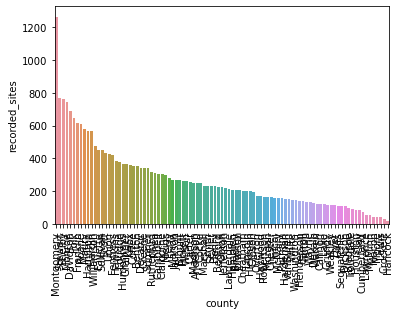

<Figure size 1440x1440 with 0 Axes>

In [15]:
sns.barplot(data=counties_2, x='county', y='recorded_sites')
plt.xticks(rotation=90)
plt.figure(figsize=(20,20))

### count of sites by owner type

In [ ]:
#value counts of sites by owner type
ownership = sites_df.Ownership.value_counts()
ownership

In [ ]:
#turn into dataframe
pd.DataFrame(data = ownership)

In [ ]:
#reset the index
ownership = ownership.reset_index()
ownership

In [ ]:
#rename columns
ownership = ownership.rename(columns={"index": "owner_type", "Ownership": "recorded_sites"})
ownership

In [ ]:
#replace blank values with "unknown"
ownership = ownership.replace(' ', 'unknown')
ownership

In [ ]:
#rename federal government rows
ownership = ownership.replace('federal', 'federal gov')
ownership

In [ ]:
#rename local government rows
ownership = ownership.replace('Local', 'local gov')
ownership

In [ ]:
#group owner_type column by unique values and sum identical owner_types together
ownership = ownership.groupby(by="owner_type").sum('recorded_sites')
ownership

In [ ]:
#sort recorded sites in descending order
ownership = ownership.sort_values(by="recorded_sites", ascending = False)
ownership

In [ ]:
#reset index
ownership = ownership.reset_index()
ownership

In [ ]:
sns.barplot(data = ownership, x = "owner_type", y = "recorded_sites")

### count of sites by prehistoric site type

In [ ]:
prehistoric_types = sites_df.PrehType.value_counts()
prehistoric_types

### count of sites by historic site type

In [ ]:
historic_types = sites_df.HistType.value_counts()
historic_types

### count of sites by physical division

In [ ]:
physical_division = sites_df.PhysioDiv.value_counts()
physical_division

In [ ]:
pd.DataFrame(data = physical_division)

In [ ]:
physical_division = physical_division.reset_index()
physical_division

In [ ]:
physical_division = physical_division.rename(columns={"index": "physical_division", "PhysioDiv": "recorded_sites"})
physical_division

In [ ]:
physical_division = physical_division.replace(" ", "unknown")
physical_division

In [ ]:
sns.barplot(data = physical_division, x = "physical_division", y = "recorded_sites")
plt.xticks(rotation = 90)

### count of sites by land use type

In [ ]:
land_use = sites_df.LandUse.value_counts()
land_use

In [ ]:
pd.DataFrame(data = land_use)

In [ ]:
land_use = land_use.reset_index()
land_use

In [ ]:
land_use = land_use.rename(columns={"index": "land_use", "LandUse": "recorded_sites"})
land_use

In [ ]:
land_use = land_use.replace(" ", "other")
land_use

In [ ]:
land_use = land_use.replace("s", "other")
land_use

In [ ]:
land_use = land_use.replace("Other", "other")
land_use

In [ ]:
land_use = land_use.groupby(by="land_use").sum('recorded_sites')
land_use

In [ ]:
land_use = land_use.reset_index()
land_use

In [ ]:
land_use = land_use.sort_values(by = 'recorded_sites', ascending = False)
land_use

In [ ]:
sns.barplot(data = land_use, x = "land_use", y = "recorded_sites")
plt.xticks(rotation = 90)


### count of sites by reporter type

In [ ]:
reporter_type = sites_df.RptrType.value_counts()
reporter_type

In [ ]:
pd.DataFrame(data=reporter_type)

In [ ]:
reporter_type = reporter_type.reset_index()
reporter_type

In [ ]:
reporter_type = reporter_type.rename(columns={"index": "reporter_type", "RptrType": "recorded_sites"})
reporter_type

In [ ]:
reporter_type = reporter_type.replace(" ", "unknown")
reporter_type

In [ ]:
sns.barplot(data = reporter_type, 
           x = "reporter_type", 
           y = "recorded_sites")
plt.xticks(rotation = 90)

### count of sites by survey level

In [ ]:
survey_level = sites_df.SurvLevel.value_counts()
survey_level

In [ ]:
pd.DataFrame(data = survey_level)

In [ ]:
survey_level = survey_level.reset_index()
survey_level

In [ ]:
survey_level = survey_level.rename(columns={"index": "survey_level", "SurvLevel": "recorded_sites"})
survey_level

In [ ]:
survey_level = survey_level.replace(" ", "unknown")
survey_level

In [ ]:
sns.barplot(data = survey_level, 
           x = "survey_level", 
           y = "recorded_sites")
plt.xticks(rotation = 90)